#### Exploratory Data Analysis

In [1]:
import os

# To get the current working directory
cwd = os.getcwd()

# To get the parent of CWD
parent_dir = os.path.dirname(cwd)

#Path to data set
cleaned_data_path = os.path.join(parent_dir,"dataCleaning","processed_data.csv")
print("Path to cleaned data is :",cleaned_data_path)

Path to cleaned data is : c:\Users\nikhi\ba_dataScience\dataCleaning\processed_data.csv


In [2]:
#importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

from wordcloud import WordCloud,STOPWORDS

In [3]:
df = pd.read_csv(cleaned_data_path,index_col=0)
df = df.reset_index(drop=True)

In [4]:
df.head()

,Reviews,Stars,Date,Country,Verified,Cleaned_reviews
0,Have no fear when your BA flight is operated...,5.0,2024-02-21,United Kingdom,True,fear ba flight operated finnair business class...
1,We have flown BA five times from western USA...,10.0,2024-02-17,United States,False,flown ba five time western usa england always ...
2,London Heathrow to Istanbul at the start of ...,3.0,2024-02-17,United Kingdom,True,london heathrow istanbul start halfterm school...
3,"Jan 30th, I booked a last-minute, transatlant...",3.0,2024-02-16,United States,False,jan 30th booked lastminute transatlantic fligh...
4,I am a British Airways Gold Guest List member...,2.0,2024-02-11,United States,True,british airway gold guest list member lifetime...


#### What is the average overall rating given for British Airways?

In [5]:
df.Stars.mean()

4.628040057224607

#### What is the total count for each rating?

Text(0.5, 0.98, 'Frequency count for Each Rating')

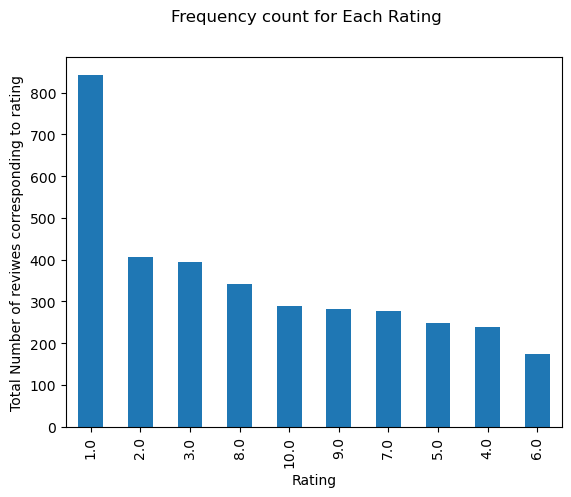

In [6]:
df.Stars.value_counts().plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Total Number of reviwes corresponding to rating")
plt.suptitle("Frequency count for Each Rating")

In [23]:
# Get the value counts of the 'stars' column
star_counts = df['Stars'].value_counts().sort_index()

# Create a new DataFrame with unique star values and their counts
df_ratings = pd.DataFrame({'Stars': star_counts.index, 'Count': star_counts.values})
pct_values = (df_ratings.Stars.values/ df_ratings.Stars.values.sum()*100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [24]:
df_ratings = df_ratings.reset_index()

In [25]:
df_ratings.head()

,index,Stars,Count,pct_values
0,0,1.0,843,1.82
1,1,2.0,406,3.64
2,2,3.0,395,5.45
3,3,4.0,239,7.27
4,4,5.0,249,9.09


In [27]:
df_ratings.drop(columns=['index'],inplace=True)
df_ratings.head()


,Stars,Count,pct_values
0,1.0,843,1.82
1,2.0,406,3.64
2,3.0,395,5.45
3,4.0,239,7.27
4,5.0,249,9.09


In [28]:
df_ratings

,Stars,Count,pct_values
0,1.0,843,1.82
1,2.0,406,3.64
2,3.0,395,5.45
3,4.0,239,7.27
4,5.0,249,9.09
5,6.0,175,10.91
6,7.0,277,12.73
7,8.0,342,14.55
8,9.0,281,16.36
9,10.0,288,18.18


c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Counts for each ratings')

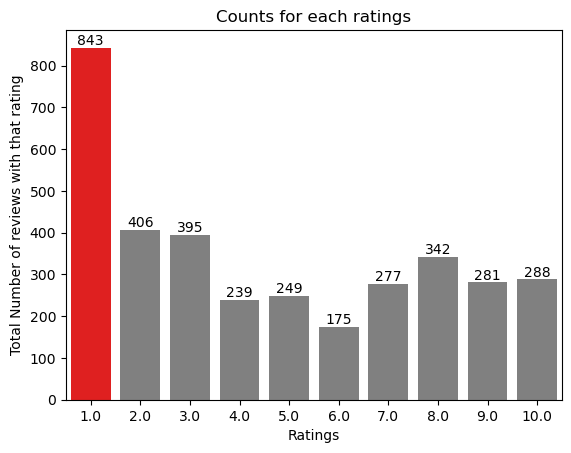

In [30]:
clrs = ['Red' if (x ==  max(df_ratings.Count)) else 'grey' for x in df_ratings.Count ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.Count, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [32]:
# Number of unique countries BA recieved reviews from
print(f'{len(df.Country.unique())} Unique Countries')

70 Unique Countries


#### Which country most reviews comes from?

In [33]:
df_country_review = pd.DataFrame(df.Country.value_counts().head()).reset_index()

In [34]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

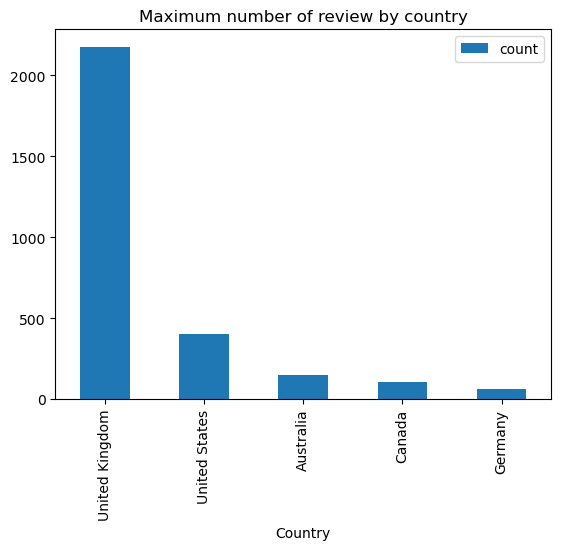

In [36]:
df_country_review.plot(kind="bar", x='Country')
plt.title("Maximum number of review by country")

#### Which Country provides on average highest ratings?

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviews          3495 non-null   object 
 1   Stars            3495 non-null   float64
 2   Date             3495 non-null   object 
 3   Country          3495 non-null   object 
 4   Verified         3495 non-null   bool   
 5   Cleaned_reviews  3495 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 140.1+ KB


In [40]:
df_country_rating = pd.DataFrame(df.groupby('Country')['Stars'].mean().sort_values(ascending=False)).reset_index()


In [42]:
df_country_rating.rename(columns={'Stars':'avg_rating'}, inplace=True)


c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

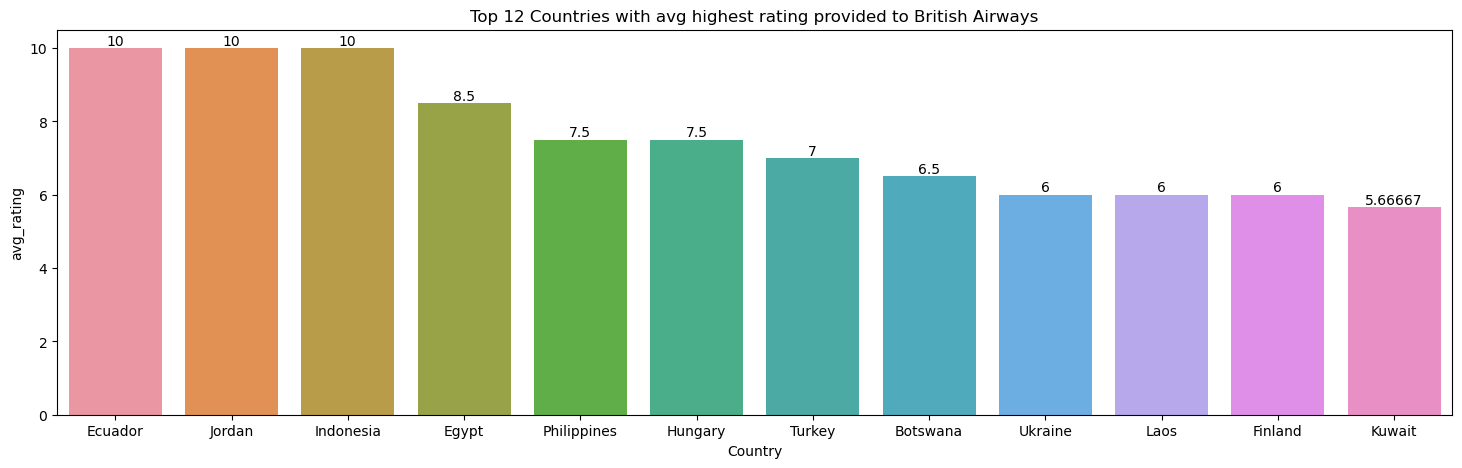

In [43]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='Country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")